<a href="https://colab.research.google.com/github/Aidzillafont/Student-Performace-/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data Set
The dataset for this exploration was taken from the popular website kaggle see [source](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams).  
This data contains 5 features and 3 exam scores.

### Features

| Name | Description | Type |
| :------ | :------ | :------ |
| gender | male or female | object |
| race/ethnicity | Groups A-E | object |
| parental level of education | how educated were the students parents  | object |
| lunch | whether the student got a reduced or standard lunch | object |
| test preparation course | completed or none done at all | object |

### Exam Scores
* math score (0-100)
* reading score (0-100)
* writing score (0-100)

## The Goal
The goal of this exploration is to determine relationship of the features on the students performance. We will attempt to do this using
some groupby aggregation in pandas and some visualizations using seaborn all in a python jupyter notebook. Finally we will construct a random forest based model
using sklearn to try to predict a given students performance.


## EDA

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/Aidzillafont/Student-Performace-/blob/37be2cfff7c6c02ecb002231fb88e0b8647cc0b3/StudentsPerformance.csv?raw=true')


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


As can be seen there is a number of scores on math, reading and writing. These are for varing types of people. Lets aggregate some of the groups to see if there is an things standing out.

In [ ]:
features = []
for col in df.columns:
  if df[col].dtype==object:
    features.append(col)
    print(df.groupby(col).agg(['mean']).round(2),'\n')


       math score reading score writing score
             mean          mean          mean
gender                                       
female      63.63         72.61         72.47
male        68.73         65.47         63.31 

               math score reading score writing score
                     mean          mean          mean
race/ethnicity                                       
group A             61.63         64.67         62.67
group B             63.45         67.35         65.60
group C             64.46         69.10         67.83
group D             67.36         70.03         70.15
group E             73.82         73.03         71.41 

                            math score reading score writing score
                                  mean          mean          mean
parental level of education                                       
associate's degree               67.88         70.93         69.90
bachelor's degree                69.39         73.00         73.38

A quick review of the above we can make some of the following observations, in this data set we can see that:

*   Women score on average higher than men in every subject excluding maths
*   Group A perform poorly where Group E are on average score the highest
*   The higher your parents education is the higher yours should be.
*   Students who recieved a free/reduced lunch performed worse than those who recived a standard lunch.
*   Students who dis a test preparation course performed better in exams.

Lets try an viszualize some of these patterns in a few vizualizations



## Vizualizations

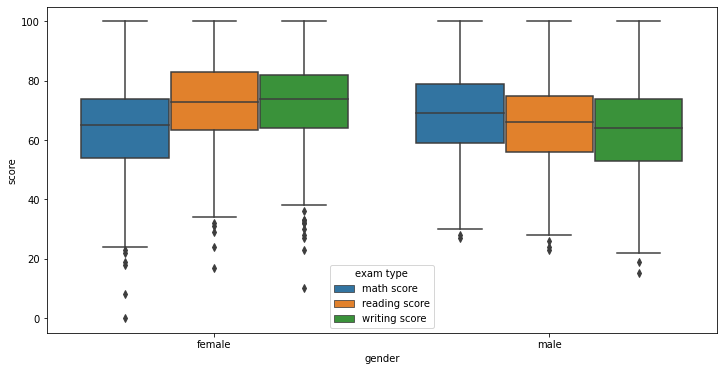

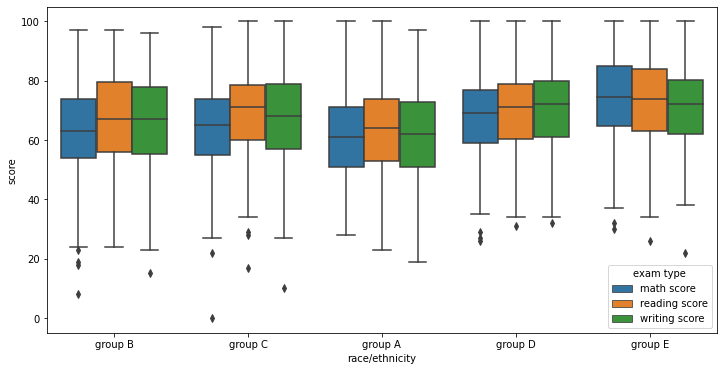

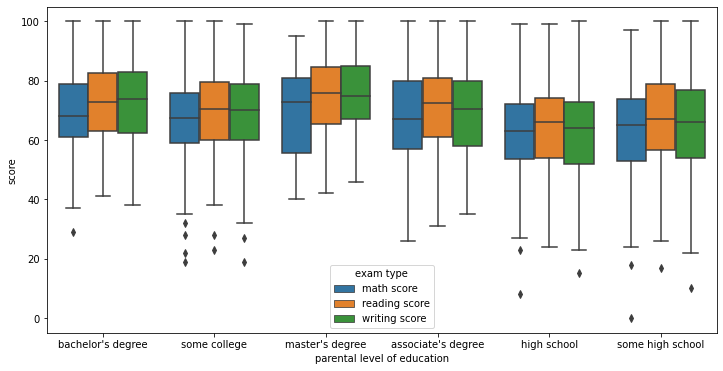

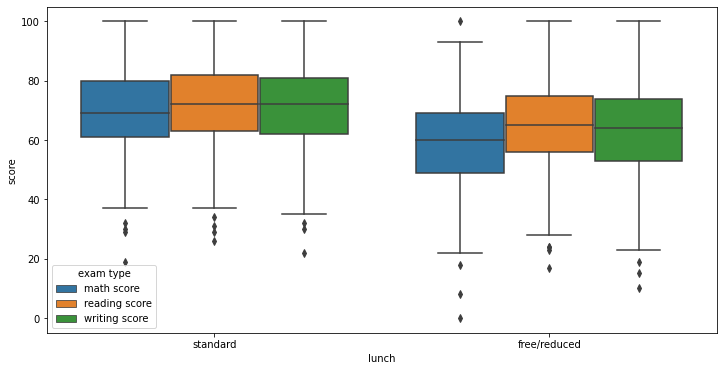

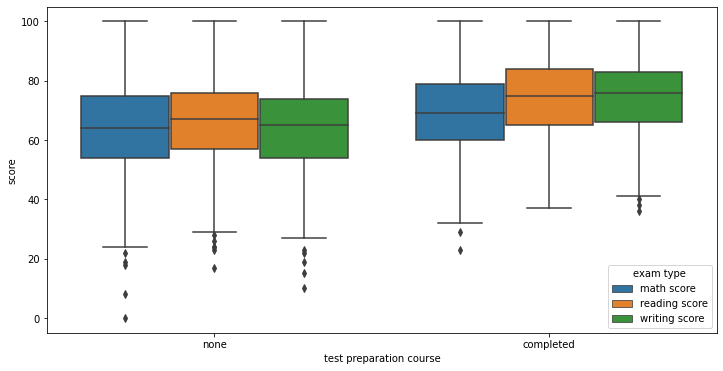

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#targets = ['math score', 'reading score', 'writing score']

#frist we need to melt the data set to pass to out seaborn box plot
df_melt = pd.melt(df, id_vars=features, var_name='exam type', value_name='score')

for feat in features:
  plt.figure(figsize=(12,6))
  plot = sns.boxplot(x=feat,hue='exam type', y='score', data=df_melt)


The above plots vizualize the spread of scores for each subject across each variable. As we can see here even though we observerd different means there is a lot of overlap. This suggests that given you may have features that should reduce your score you can over come it.

However if you have every thing against you or everything for you this does seem to have a clear indication of performance.
below we can see results of the students with the worst set of features vs those with the best. Here you can see a clear separation

In [ ]:
df_worst = df[(df['gender']=='male')&(df['race/ethnicity']=='group A')&(df['parental level of education']=='high school')&(df['lunch']=='free/reduced')&(df['test preparation course']=='none')]
df_best = df[(df['gender']=='female')&(df['race/ethnicity']=='group E')&(df['parental level of education']=='master\'s degree')&(df['lunch']=='standard')&(df['test preparation course']=='completed')]

In [ ]:
df_worst

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
395,male,group A,high school,free/reduced,none,48,45,41
688,male,group A,high school,free/reduced,none,53,58,44
811,male,group A,high school,free/reduced,none,45,47,49


In [ ]:
df_best

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
685,female,group E,master's degree,standard,completed,94,99,100
995,female,group E,master's degree,standard,completed,88,99,95


Its worth noteing that alot of these features are out of ones control. In fact the only two that a prospective student can control is their lunch and test course preperation. So lets look at the combined effect of these in some plots and groupings and see how the seperate a students performance


In [ ]:
df.groupby(['lunch', 'test preparation course']).agg(['mean'])

math score reading score writing score
                                           mean          mean          mean
lunch        test preparation course                                       
free/reduced completed                63.045802     69.870229     70.351145
             none                     56.508929     61.602679     58.736607
standard     completed                73.533040     76.215859     76.766520
             none                     68.133971     69.177033     67.595694

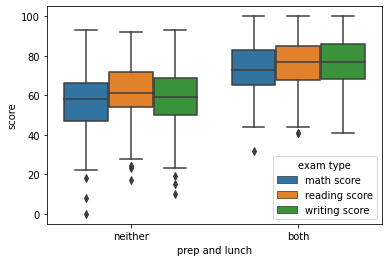

In [ ]:
pd.options.mode.chained_assignment = None 

df_melt_fn = df_melt[(df_melt['lunch']=='free/reduced')&(df_melt['test preparation course']=='none')]
df_melt_sc = df_melt[(df_melt['lunch']=='standard')&(df_melt['test preparation course']=='completed')]

df_melt_fn.loc[:,'prep and lunch']='neither'
df_melt_sc.loc[:,'prep and lunch']='both'

df_melt2 = df_melt_fn.append(df_melt_sc, ignore_index=True)
plot = sns.boxplot(x='prep and lunch',hue='exam type', y='score', data=df_melt2)


As can be seen from the above plot people who have improved there lunch and taken an test preparation course have seen better results according to the data set.

## Build a Pipeline and Model

Now we have done our EDA showing how all of the feature variables separate performance of students lets build a model to predict performance of a student in the math subject.

First we need to make a test train split

In [ ]:
from sklearn.model_selection import train_test_split
target = ['math score']
X, y = df[features], df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 5) (300, 5) (700, 1) (300, 1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([('hot', OneHotEncoder()), ('rf', RandomForestRegressor())])

param_grid = {
    "rf__n_estimators": [300, 500, 1000],
    "rf__criterion": ['absolute_error'],
    "rf__max_depth": [None,2,3,4],
}


cv = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=3, verbose=10, scoring='neg_mean_absolute_error')
cv.fit(X_train, y_train.values.ravel())

print('The best score was: ', cv.best_score_, ' with the following parameters.\n')
print(cv.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
The best score was:  -11.100714033886424  with the following parameters.

{'rf__criterion': 'absolute_error', 'rf__max_depth': 4, 'rf__n_estimators': 300}


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
preds = cv.best_estimator_.predict(X_test)
#print(np.sqrt(np.mean(np.power(preds - y_test.values,2))))
mean_absolute_error(preds,y_test)

10.68906111111111

Here we can see our model gets a RMSE of 13.66 and 16.35 on train and test respectivly. This means our model was on average predicting a score around 16 precentage points away from our true score.


Lets change our regression problem into a classification problem by changing scores to grades following the below schema

Grade|Score
---|---
A| 90-100
B| 70-89
C| 50-69
D| 40-49
F| 0-39

In python we can very easily build a function to do this.

In [ ]:
def grade_conv(x):
  if x>=90:
    return 'A'
  elif x>=70:
    return 'B'
  elif x>=50:
    return 'C'
  elif x>=40:
    return 'D'
  else:
    return 'F'

apply the function to our y_test and y_train

In [ ]:
y_train_grade = y_train[target[0]].apply(lambda x: grade_conv(x))
y_test_grade = y_test[target[0]].apply(lambda x: grade_conv(x))

Below we build a random forest classifier and run a grid search cross validation to train our hyper parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('hot', OneHotEncoder()), ('rf', RandomForestClassifier())])

param_grid = {
    "rf__n_estimators": [300, 500, 700],
    "rf__criterion": ['gini', 'entropy'],
    "rf__max_depth": [None,2,3,4],
    "rf__max_features": ['auto','sqrt','log2',None]
}


cv = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=3, verbose=10)
cv.fit(X_train, y_train_grade)

print('The best score was: ', cv.best_score_, ' with the following parameters.\n')
print(cv.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
The best score was:  0.49283469669735763  with the following parameters.

{'rf__criterion': 'gini', 'rf__max_depth': 2, 'rf__max_features': 'sqrt', 'rf__n_estimators': 700}


In [ ]:
from sklearn.metrics import accuracy_score
preds = cv.best_estimator_.predict(X_test)
accuracy_score(preds,y_test_grade)

0.53

here we get an accuracy score of 53% which is only slightly better than guessing the most common class the C grade

## Conclusions

Where the random forest model did not perfporm as well as hoped we can certianly look to investigate more predictive models in the future.

As for inslights to the data they are summarised by:

*   Women score on average higher than men in every subject excluding maths
*   Group A perform poorly where Group E are on average score the highest
*   The higher your parents education is the higher yours should be.
*   Students who recieved a free/reduced lunch performed worse than those who recived a standard lunch.
*   Students who dis a test preparation course performed better in exams.

We saw these by looking at some barplots using seaborn along with some groupby in pandas

If you would like to check out this notebook yourself please take a look at my [github](https://github.com/Aidzillafont/Student-Performace-)